In [1]:
#connect("localhost")
$connect("192.168.0.156")

import platform
print(platform.uname())


[display] tips: os.environ(export) not _MAIX_WIDTH_ or _MAIX_HEIGHT_.
uname_result(system='Linux', node='sipeed', release='4.9.118', version='#3 PREEMPT Mon Jan 25 05:20:05 UTC 2021', machine='armv7l', processor='')


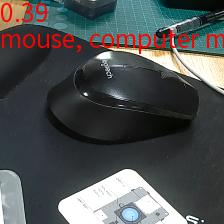


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt



In [1]:
from maix import nn
from PIL import Image, ImageDraw, ImageFont
from maix import camera, display

# /root/classes_label.py
from root.classes_label import labels

font = ImageFont.truetype("/root/SourceHanSansCN-Normal.ttf", 25, encoding="unic")  # 设置字体

model = {
    "param": "/root/models/resnet_awnn.param",
    "bin": "/root/models/resnet_awnn.bin"
}

display.local_show(True)

# display.local_show(False)
# display.hook(clear_output=True)

camera.config(size=(224, 224))

options = {
    "model_type":  "awnn",
    "inputs": {
        "input0": (224, 224, 3)
    },
    "outputs": {
        "output0": (1, 1, 1000)
    },
    "first_layer_conv_no_pad": False,
    "mean": [127.5, 127.5, 127.5],
    "norm": [0.00784313725490196, 0.00784313725490196, 0.00784313725490196],
}
print("-- load model:", model)
m = nn.load(model, opt=options)
print("-- load ok")

while True:
    img = camera.capture()
    if not img:
        time.sleep(0.02)
        continue
    out = m.forward(img, quantize=True)
    out = nn.F.softmax(out)
    msg = "{:.2f}\n{}".format(out.max(), labels[out.argmax()])
#     print(msg)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), msg, fill=(255, 0, 0), font=font)
    
    display.show(img)

